In [4]:
import numpy as np   
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import gridspec

# Set font to prevent boxes appearing in the plot
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False


In [2]:
# Define the system of differential equations (EGT model)
def EGT(Fx, t, R1, R2, F1, F2, S1, S2, V1, V2, K, m, n, delta,
        I1, P, Chigh, Clow, D, I2, lambda_val, DeltaU, H, C, N):
    x, y, z = Fx.tolist()  # Unpack state variables
    # Define the differential equations for x, y, z
    dxdt = x * (1 - x) * (R1 - R2 + (S2 - S1 + F2 - F1) * y + n * (P - I1) * z - delta * n * (P - I1) * y * z)
    dydt = y * (1 - y) * (S2 + m * n * (Clow - Chigh) + F2 + x * (S1 - S2 + delta * m * n * (K - Chigh - D) + (F1 - F2)) 
                          + x * z * ((1 + delta) * m * n * (K - D) + m * n * ((1 + 2 * delta) * Chigh + delta * Clow) 
                                     + delta * n * P - C))
    dzdt = z * (1 - z) * (V2 + DeltaU + x * (V1 - V2 + delta * m * n / N * H) 
                          + y * (lambda_val - 1) * DeltaU 
                          + x * y * (delta * n * I2 + delta ** 2 * m * n / N * H))
    return [dxdt, dydt, dzdt]


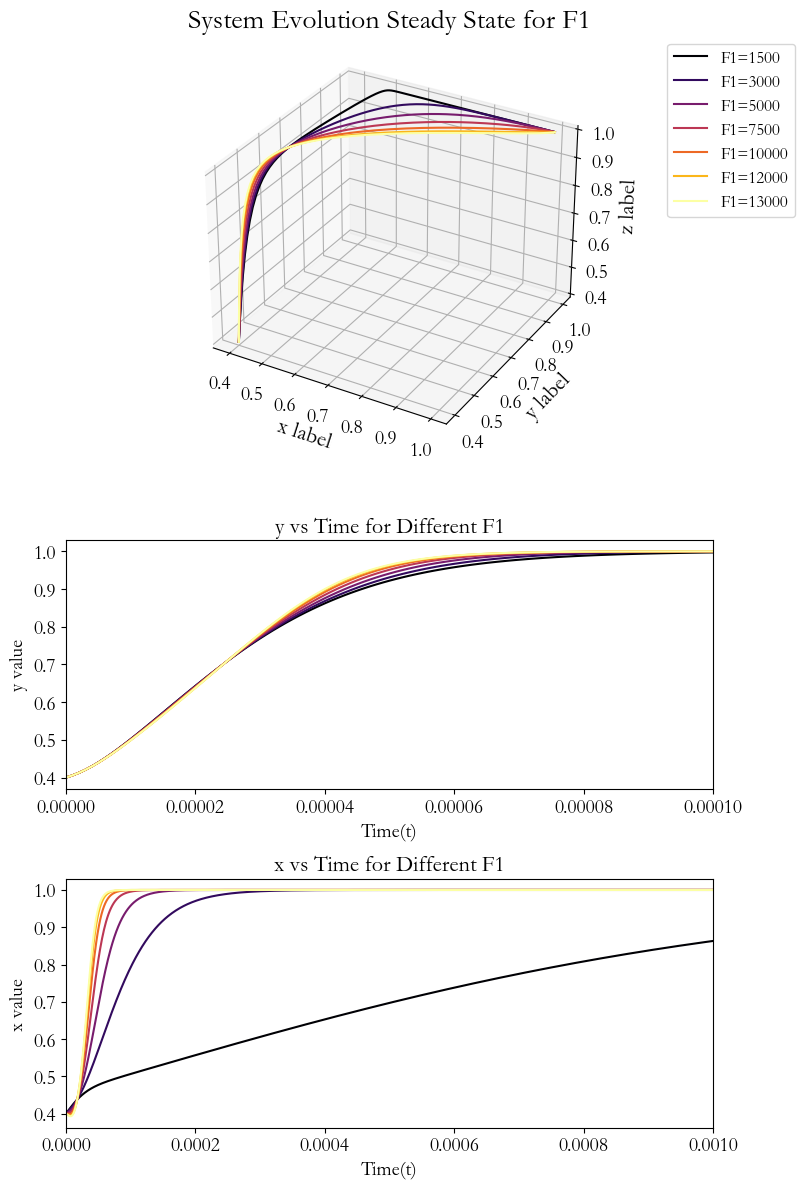

In [5]:
# Initialize the plot
plt.close("all")
fig = plt.figure(figsize=(8, 12))  # Adjust figure size to accommodate multiple plots

# Use gridspec to create 3 subplots
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.6, 0.6])  # The first row takes more space

# Create the 3D plot and 2D plots (x, y)
ax1 = fig.add_subplot(gs[0], projection='3d')  # 3D plot
ax3 = fig.add_subplot(gs[1])  # 2D plot for y vs time (position swapped)
ax2 = fig.add_subplot(gs[2])  # 2D plot for x vs time (position swapped)

# Time range
t = np.arange(0, 0.1, 0.000001)  # Original time range

# List of new F1 values to simulate
F1_values = [1500, 3000, 5000, 7500, 10000, 12000, 13000] 

# Use the "inferno" colormap for line colors
colors = cm.inferno(np.linspace(0, 1, len(F1_values)))

# Set line styles, widths, and labels
linewidths = [1.5] * len(F1_values)  # Set all line widths to 1.5
labels = [f'F1={F1}' for F1 in F1_values]

# Base parameters for the simulation
base_args = (13975.2, 4658.4, 1418.74, 709.37, 100, 10, 0.01, 0, 7000, 4, 13, 2,
            2189.49, 2000, 246.375, 492.75, 7130.73, 0.09, 0.029, 526000, 255.19, 1798.19, 26)

# Storage for x and y data corresponding to each F1 value
x_data = {}
y_data = {}

# Solve the system and plot the 3D trajectory
for i, F1 in enumerate(F1_values):
    args = base_args[:12] + (F1,) + base_args[13:]  # Update the F1 parameter
    track1 = odeint(EGT, (0.4, 0.4, 0.4), t, args)  # Solve the system of equations
    
    # Plot the 3D trajectory for each F1 value
    ax1.plot3D(track1[:, 0], track1[:, 1], track1[:, 2], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])
    
    # Extract x and y values, store in dictionaries
    x_data[F1] = track1[:, 0]  # track1[:, 0] is the x value
    y_data[F1] = track1[:, 1]  # track1[:, 1] is the y value

# Plot the 2D graph (y vs time)
for i, F1 in enumerate(F1_values):
    ax3.plot(t, y_data[F1], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])

# Set the time range for the y graph to [0, 0.05]
ax3.set_xlim([0, 0.0001])
ax3.set_xlabel('Time(t)', fontsize=14)
ax3.set_ylabel('y value', fontsize=14)
ax3.set_title('y vs Time for Different F1', fontsize=16)

# Plot the 2D graph (x vs time)
for i, F1 in enumerate(F1_values):
    ax2.plot(t, x_data[F1], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])

# Set the time range for the x graph to [0, 0.05]
ax2.set_xlim([0, 0.001])
ax2.set_xlabel('Time(t)', fontsize=14)
ax2.set_ylabel('x value', fontsize=14)
ax2.set_title('x vs Time for Different F1', fontsize=16)

# Set legend, labels, and titles for the 3D plot
ax1.legend(loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=12)
ax1.set_xlabel('x label', fontsize=16)
ax1.set_ylabel('y label', fontsize=16)
ax1.set_zlabel('z label', fontsize=16)
ax1.set_title('System Evolution Steady State for F1', fontsize=20)

# Adjust the font size for axis labels and ticks
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax1.zaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

for tick in ax3.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax3.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

# Save the plot as a PDF file
plt.tight_layout()
plt.savefig('Figure9(a).pdf', format='pdf')

# Display the plot
plt.show()
